<a href="https://colab.research.google.com/github/Manjula22-eng/py/blob/main/Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

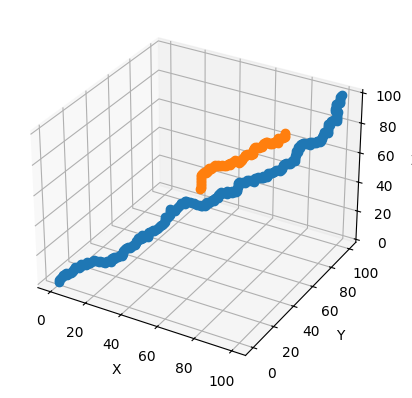

In [1]:
import numpy as np
import heapq
import matplotlib.pyplot as plt

# Define grid size
GRID_SIZE = 101

# Generate random weights (some points have higher weights)
np.random.seed(42)
weights = np.random.randint(1, 10, (GRID_SIZE, GRID_SIZE, GRID_SIZE))

# Directions for movement in 3D (6 possible moves)
DIRECTIONS = [(1, 0, 0), (-1, 0, 0), (0, 1, 0), (0, -1, 0), (0, 0, 1), (0, 0, -1)]

def dijkstra_3d(start, end):
    """Finds shortest path in a 3D grid using Dijkstra's algorithm."""
    pq = []
    heapq.heappush(pq, (0, start))  # (cost, (x, y, z))
    distances = np.full((GRID_SIZE, GRID_SIZE, GRID_SIZE), np.inf)
    distances[start] = 0
    parent = {}

    while pq:
        cost, (x, y, z) = heapq.heappop(pq)
        if (x, y, z) == end:
            path = []
            while (x, y, z) in parent:
                path.append((x, y, z))
                x, y, z = parent[(x, y, z)]
            path.append(start)
            path.reverse()
            return path

        for dx, dy, dz in DIRECTIONS:
            nx, ny, nz = x + dx, y + dy, z + dz
            if 0 <= nx < GRID_SIZE and 0 <= ny < GRID_SIZE and 0 <= nz < GRID_SIZE:
                new_cost = cost + weights[nx, ny, nz]
                if new_cost < distances[nx, ny, nz]:
                    distances[nx, ny, nz] = new_cost
                    parent[(nx, ny, nz)] = (x, y, z)
                    heapq.heappush(pq, (new_cost, (nx, ny, nz)))

    return None  # No path found

# Define multiple start and end points
start_points = [(0, 0, 0), (50, 50, 50)]
end_points = [(100, 100, 100), (80, 80, 80)]
paths = []

for start, end in zip(start_points, end_points):
    path = dijkstra_3d(start, end)
    if path:
        paths.append(path)

# Plot paths in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for path in paths:
    xs, ys, zs = zip(*path)
    ax.plot(xs, ys, zs, marker='o')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()